# Complete Regression - Lab

## Introduction
By now, you have created all the necessary functions to calculate the slope, intercept, best-fit line, prediction and visualizations. In this lab you will put them all together to run a regression experiment and calculate the model loss. 

## Objectives

You will be able to:

* Run a complete regression analysis using python

## The formulas

**Slope**: 
$\hat m = \dfrac{\overline{x}*\overline{y}-\overline{xy}}{(\overline{x})^2-\overline{x^2}}$


**Intercept**: $ \hat c = \bar{y} - \hat m\bar{x}$

**Prediction**: $\hat{y} = \hat mx + \hat c$

**R-Squared**: 
$ R^2 = 1- \dfrac{SS_{RES}}{SS_{TOT}} = 1 - \dfrac{\sum_i(y_i - \hat y_i)^2}{\sum_i(y_i - \overline y_i)^2} $


Use the python functions created earlier to implement these formulas to run a regression analysis using x and y as input variables. 

Basic Regression Diagnostics
----------------------------
Slope:  0.56
Y-Intercept:  6.33
R-Squared:  -1.0484848484848484
----------------------------
Model: Y = 0.56 * X + 6.33


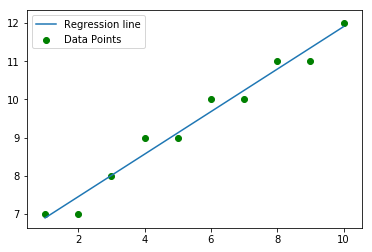

In [23]:
# Combine all the functions created so far to run a complete regression experiment. 
# Produce an output similar to the one shown below. 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def calc_slope(xs,ys):
    numerator = np.mean(xs) * np.mean(ys) - np.mean(xs*ys)
    demoninator = np.mean(xs) ** 2 - np.mean(xs**2)
    
    slope = numerator/demoninator
    return slope

def best_fit(xs,ys):
    m = calc_slope(xs,ys)
    y_mean = np.mean(ys)
    x_mean = np.mean(xs)
    c = y_mean - (m * x_mean)
    return (c)

def reg_line (m, c, xs):
    #return [(m * x) + c for x in xs]
    ys =[]
    for i in range(0,len(xs)):
        y = m * xs[i] + c
        ys.append(y)
    return ys


def sq_err(y_a, y_b):
    rss = []
    for i in range(0,len(y_a)):
        residual = y_a[i] - y_b[i]
        residual_sq = residual * residual
        rss.append(residual_sq)
    return sum(rss)

def r_squared(y_real, y_predicted):

    numerator = sq_err(y_real,y_predicted)
    
    errors= []
    y_mean = y_real.mean()
    
    for i in range(0,len(y_predicted)):
        error_sq = (y_real[i] - y_mean) ** 2
        errors.append(error_sq)
    denominator = sum(errors)
    temp = numerator / denominator
    r_2 = 1 - (numerator / denominator) #error in here, causing R**2 to be wrong
    return r_2


X = np.array([1,2,3,4,5,6,7,8,9,10], dtype=np.float64)
Y = np.array([7,7,8,9,9,10,10,11,11,12], dtype=np.float64)

m = calc_slope(X,Y)
c = best_fit(X,Y)
regression_line = reg_line(m,c,X)

print("Basic Regression Diagnostics")
print("----------------------------")
print('Slope: ', round(m,2))
print('Y-Intercept: ', round(c,2))
print('R-Squared: ', r_squared(X,Y))
print('----------------------------')
print('Model: Y = {} * X + {}'.format(round(calc_slope(X,Y),2), round(best_fit(X,Y),2)))


plt.plot(X,regression_line, label="Regression line")
plt.scatter(X,Y, color='green',label= "Data Points")
plt.legend()

Basic Regression Diagnostics
----------------------------
Slope: 0.56
Y-Intercept: 6.33
R-Squared: 0.97
----------------------------
Model: Y = 0.56 * X + 6.33


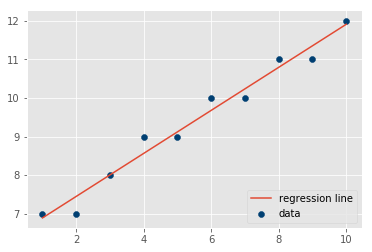

In [70]:
# Basic Regression Diagnostics
# ----------------------------
# Slope: 0.56
# Y-Intercept: 6.33
# R-Squared: 0.97
# ----------------------------
# Model: Y = 0.56 * X + 6.33

## Make Predictions

Predict and plot the value of y using regression line above for a new value of $x = 4.5$.

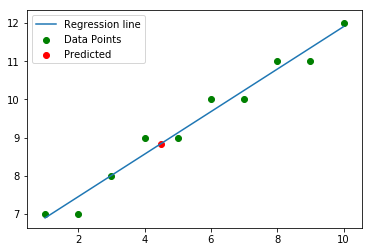

In [24]:
# Make prediction for x = 4.5 and visualize on the scatter plot
x_new = 4.5
y_predicted = m*x_new+c
y_predicted

plt.plot(X,regression_line, label="Regression line")
plt.scatter(X,Y, color='green',label= "Data Points")
plt.scatter(x_new,y_predicted, color = 'red', label='Predicted')
plt.legend()

## Level up - Optional 
Load the "`heightweight.csv`" dataset. Use the height as an independent and weight as a dependent variable and draw a regression line to data using your code above. Calculate your R-Squared value for the model and try to predict new values of y. 

## Summary

In this lab, we ran a complete simple regression analysis experiment using functions created so far. Next up, you'll learn how you can use python's built-in modules to perform similar analyses with a much higher level of sophistication. 